In [1]:
!pip install medmnist

^C


In [2]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [3]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/


In [4]:
import dataset_without_pytorch

from dataset_without_pytorch import get_loader

# We first work on a 2D dataset with size 28x28

In [5]:
data_flag = 'dermamnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

## First, we read the MedMNIST data, preprocess them and encapsulate them into dataloader form.

In [6]:
# load the data
train_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\matia\.medmnist\dermamnist.npz


In [7]:
print(train_dataset)

Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: C:\Users\matia\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [10]:
# visualization

train_dataset.montage(length=1)

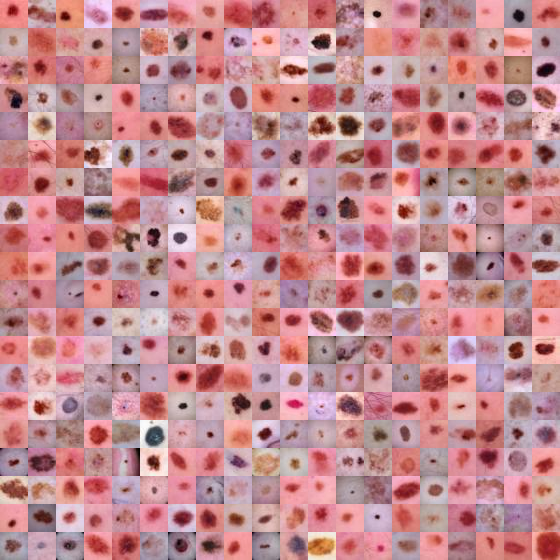

In [17]:
# montage

train_dataset.montage(length=20)

In [11]:
x, y = train_dataset[0]
print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [35]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

(128, 28, 28, 3) (128, 1)


# We then check a 2D dataset with size 128x128

In [12]:
data_flag = 'dermamnist'
download = True


info = INFO[data_flag]
DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
train_dataset = DataClass(split='train', download=download, size=128, mmap_mode='r')

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\matia\.medmnist\dermamnist_128.npz


In [37]:
x, y = train_dataset[0]

print(np.array(x).shape, y.shape)

(128, 128, 3) (1,)


In [38]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 7007
(128, 128, 128, 3) (128, 1)


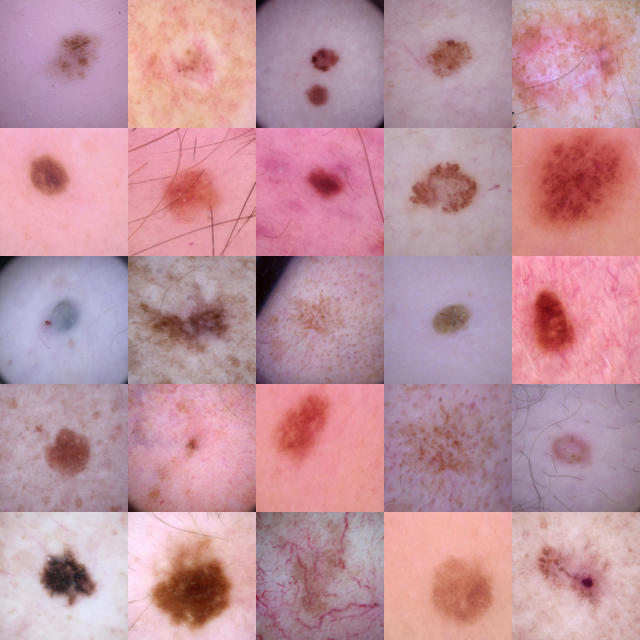

In [39]:
train_dataset.montage(length=5)

# We then check a 3D dataset with size 28x28x28

In [15]:
data_flag = 'organmnist3d'
download = True

info = INFO[data_flag]
DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
train_dataset = DataClass(split='train',  download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

Using downloaded and verified file: /home/sr/.medmnist/organmnist3d.npz


In [16]:
x, y = train_dataset[0]

print(x.shape, y.shape)

(1, 28, 28, 28) (1,)


In [17]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 971
(128, 1, 28, 28, 28) (128, 1)


In [18]:
frames = train_dataset.montage(length=1, save_folder="tmp/")
frames[10]

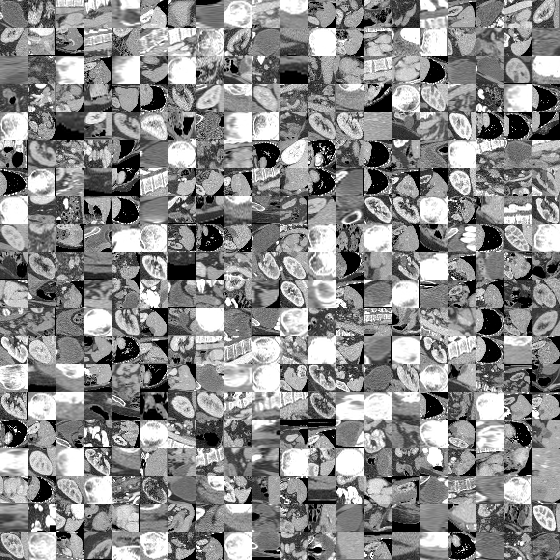

In [19]:
frames = train_dataset.montage(length=20, save_folder="tmp_without_pytorch/")

frames[10]

## Go and check the generated [gif](tmp_without_pytorch/organmnist3d_train_montage.gif) ;)

# We then check a 3D dataset with size 64x64x64

In [20]:
data_flag = 'organmnist3d'
download = True

info = INFO[data_flag]
DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
train_dataset = DataClass(split='train',  download=download, size=64)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)


Using downloaded and verified file: /home/sr/.medmnist/organmnist3d_64.npz


In [21]:
x, y = train_dataset[0]

print(x.shape, y.shape)

(1, 64, 64, 64) (1,)


In [22]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 971
(128, 1, 64, 64, 64) (128, 1)


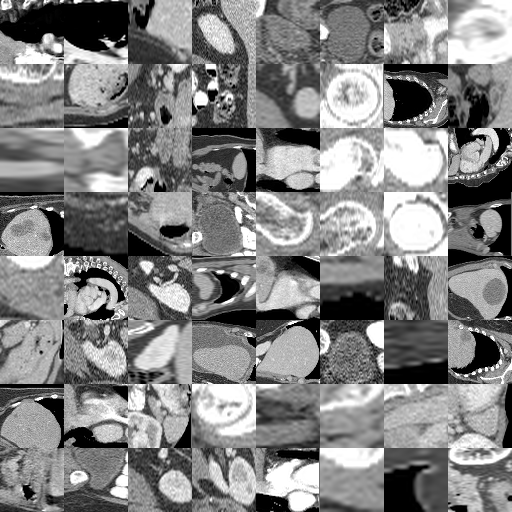

In [23]:
frames = train_dataset.montage(length=8, save_folder="tmp_without_pytorch/")

frames[10]

## Go and check the generated [gif](tmp_without_pytorch/organmnist3d_64_train_montage.gif) ;)

# Check [EXTERNAL] [`MedMNIST/experiments`](https://github.com/MedMNIST/experiments)

Training and evaluation scripts to reproduce both 2D and 3D experiments in our paper, including PyTorch, auto-sklearn, AutoKeras and Google AutoML Vision together with their weights ;)